<h1><center>Real Estate Predictive Model by Tony Henein</center></h1>

**Introduction:**

- This project involves building a predictive model for real estate prices based on a dataset that includes property features and historical prices. Using data collected from various real estate sources, we developed a model that predicts property prices. The system leverages regression analysis, feature engineering, and machine learning algorithms to forecast prices, thereby aiding buyers, sellers, and investors in making informed decisions.

**1. Data Collection and Initial Setup The dataset is divided into several files:**

1. train.csv: Contains data on various properties including features like size, location, number of rooms, and historical prices.

**2. Data Preprocessing**
The dataset required specific cleaning steps to prepare it for feature engineering:

**Properties Data:**

- Handled missing values by imputing or removing them as necessary.
- Normalized property features to ensure consistency across different properties.
- Created new features such as price per square foot.

**3. Feature Engineering**

- Created new features such as neighborhood average price and price growth rate.
- Generated rolling statistics (mean, standard deviation) for property prices to identify trends and anomalies.

**4. Model Development**

- The real estate predictive model was developed using machine learning algorithms:

- Regression Analysis: Used techniques like Linear Regression and Ridge Regression to model property prices.
- Feature Selection: Applied methods like Lasso Regression to select the most relevant features.
- Advanced Algorithms: Used Random Forest, Gradient Boosting, and XGBoost to improve prediction accuracy.

**5. Prediction Function**

The function predict_price provides price predictions based on property features:

- Checks if the property ID exists in the dataset.
- Uses the trained model to predict the price based on current features.
- Returns a predicted price and confidence interval.

**6. Evaluation and Improvements**

- Evaluated model performance using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared.
- Implemented cross-validation to ensure robustness and generalizability.
- Fine-tuned hyperparameters to improve prediction accuracy and reduce errors.


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split for splitting the dataset
from sklearn.model_selection import train_test_split

# Import LinearRegression for creating a linear regression model
from sklearn.linear_model import LinearRegression

# Import mean_squared_error and r2_score for evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Import PCA for Principal Component Analysis
from sklearn.decomposition import PCA

# accessing directory structure





In [39]:
# Define the path to the CSV file
csv_file_path = './data/train.csv'

# Define the directory where the dataset is stored
dataset_directory = './data/'

# Load the dataset into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to verify it loaded correctly
print(df.head())

# Display the summary of the DataFrame to understand its structure and contents
print(df.info())

# Display the summary statistics of the DataFrame
print(df.describe())

# Check for missing values in the DataFrame
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [40]:
import os

# Ensure the file exists
if not os.path.exists(csv_file_path):
    # Notify if the file does not exist
    print(f"File '{csv_file_path}' does not exist.")
else:
    # Read the CSV file into a DataFrame
    df_data = pd.read_csv(csv_file_path)
    
    # Display the first 5 records
    print("DataFrame loaded successfully. Displaying the first 5 records:")
    print(df_data.head())  # Show the first 5 rows of the DataFrame

DataFrame loaded successfully. Displaying the first 5 records:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrS

In [41]:
# Display the DataFrame
print("DataFrame loaded successfully. Displaying the first few rows:")
print(df_data.head())  # Print the first few rows of the DataFrame to the console

# List all columns and their types
print("\nColumns and their types:")
print(df_data.dtypes)  # Print columns and their types

# Display the summary statistics of the DataFrame
print("\nSummary statistics of the DataFrame:")
print(df_data.describe())  # Print summary statistics for numerical columns

# Check for missing values in the DataFrame
print("\nMissing values in the DataFrame:")
print(df_data.isnull().sum())  # Print the count of missing values for each column

DataFrame loaded successfully. Displaying the first few rows:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSo

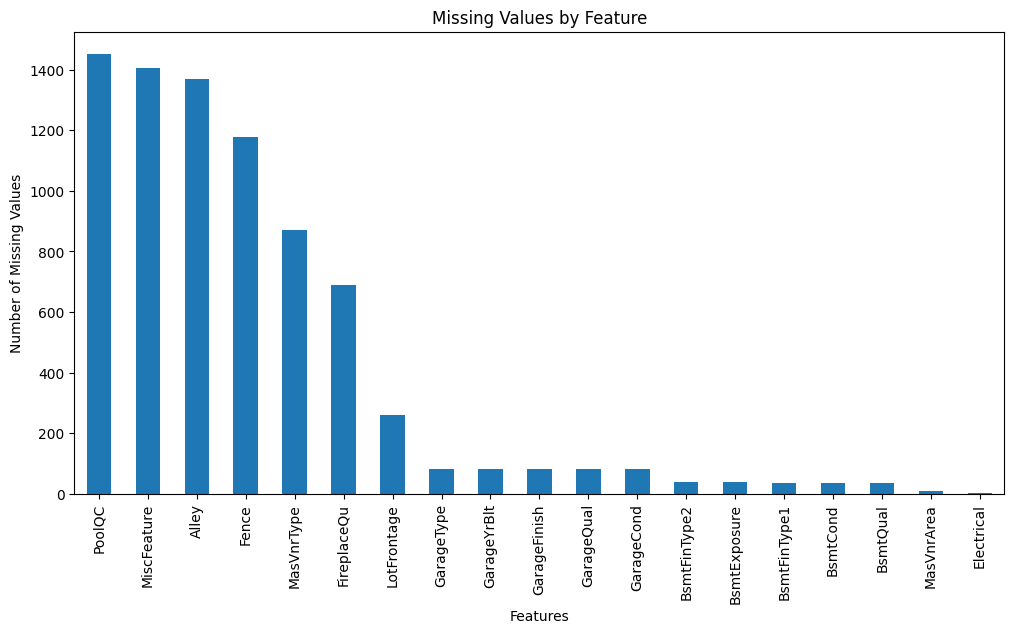

In [42]:
# Calculate the number of missing values for each column
missing_values = df_data.isnull().sum()

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0]

# Sort the missing values in descending order
missing_values.sort_values(ascending=False, inplace=True)

# Plot the missing values by feature
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()

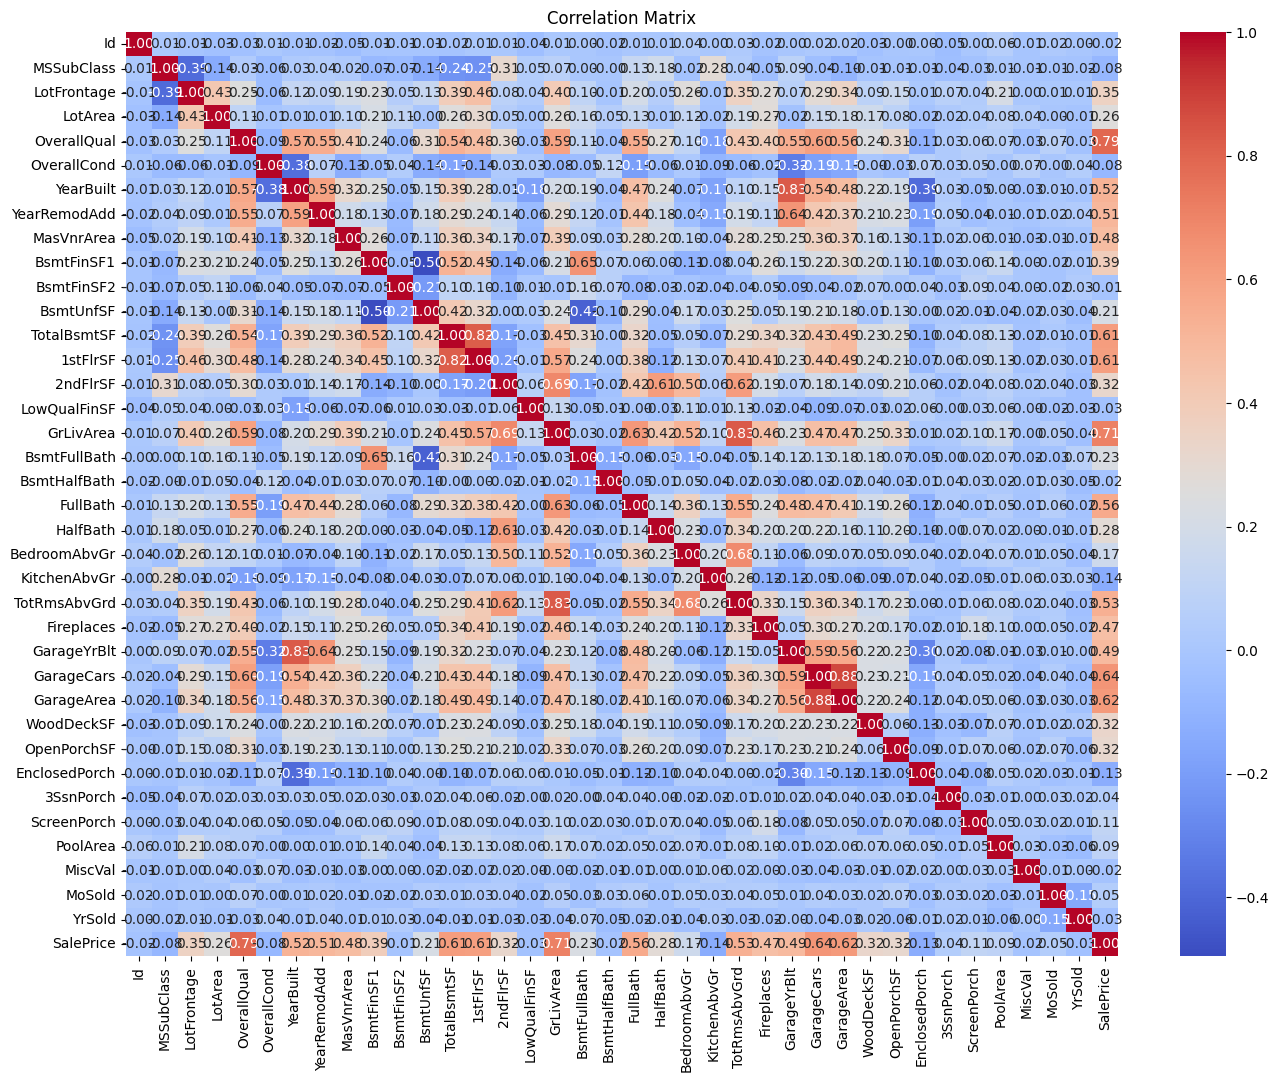

In [43]:
# Select only numeric columns from the DataFrame
numeric_cols = df_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_cols.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

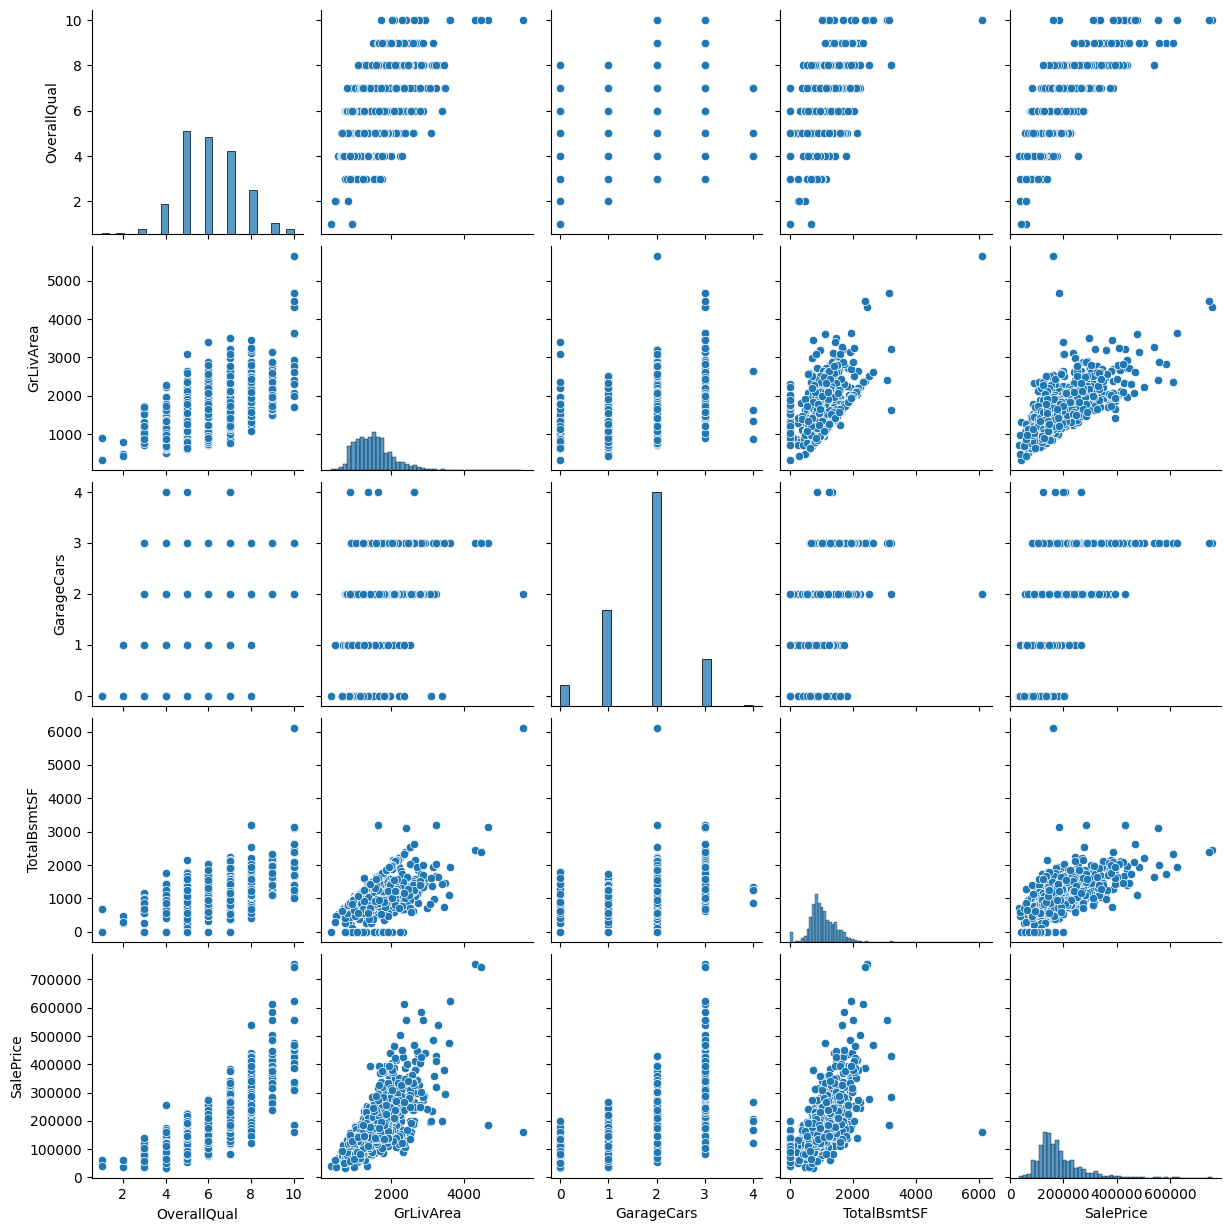

In [44]:
import seaborn as sns

# Import necessary libraries
import matplotlib.pyplot as plt

# Pairplot for selected features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'SalePrice']

# Check if the selected features exist in the dataframe
missing_features = [feature for feature in selected_features if feature not in df_data.columns]
if missing_features:
    raise ValueError(f"The following selected features are missing in the dataframe: {missing_features}")

# Create pairplot for the selected features
sns.pairplot(df_data[selected_features])
plt.show()

In [45]:
# Log transformation of the target variable
df_data['SalePrice'] = np.log1p(df_data['SalePrice'])



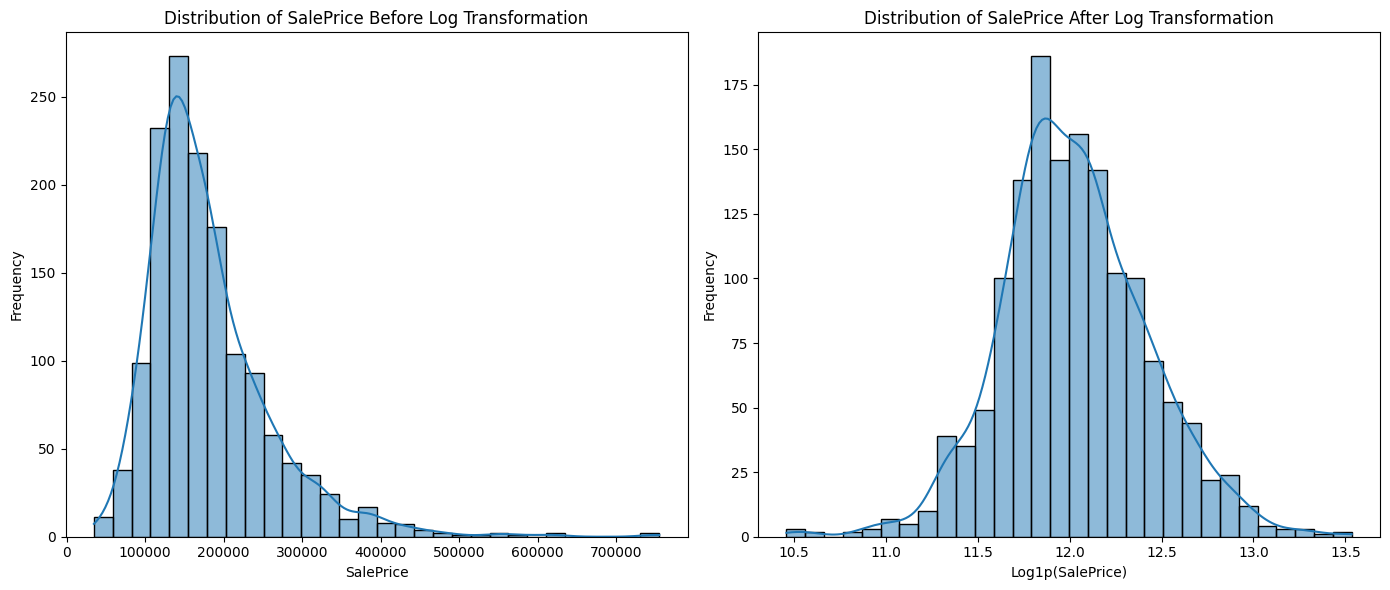

In [46]:
# Plot the distribution of SalePrice before applying log1p
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice Before Log Transformation')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

# Apply log1p transformation to SalePrice
df['SalePrice_Log1p'] = np.log1p(df['SalePrice'])

# Plot the distribution of SalePrice after applying log1p
plt.subplot(1, 2, 2)
sns.histplot(df['SalePrice_Log1p'], kde=True, bins=30)
plt.title('Distribution of SalePrice After Log Transformation')
plt.xlabel('Log1p(SalePrice)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

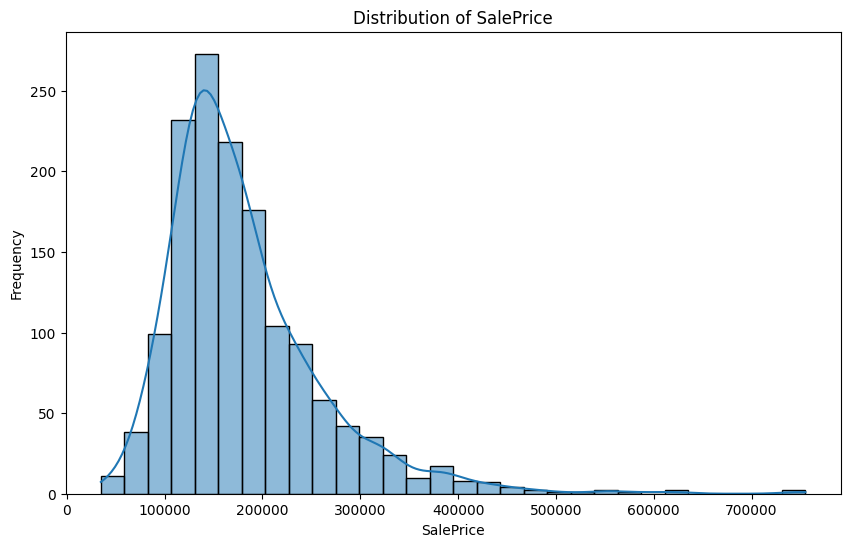

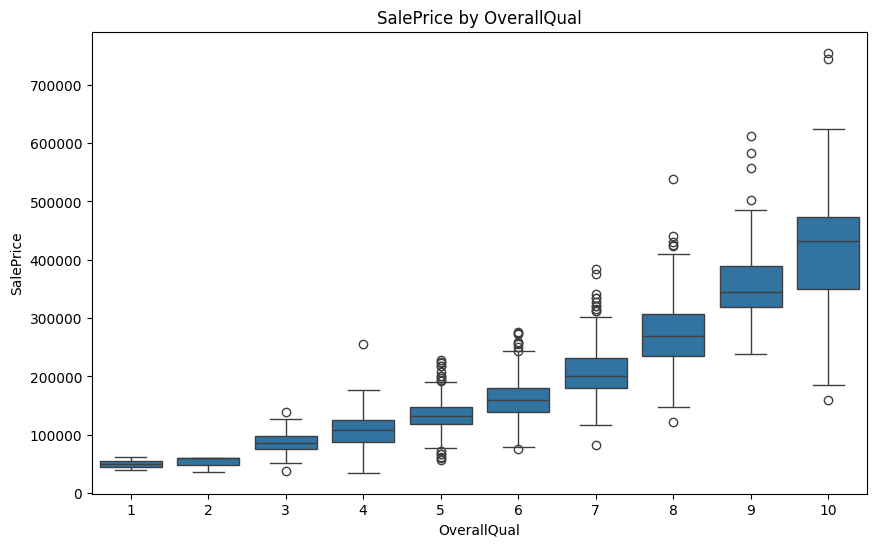

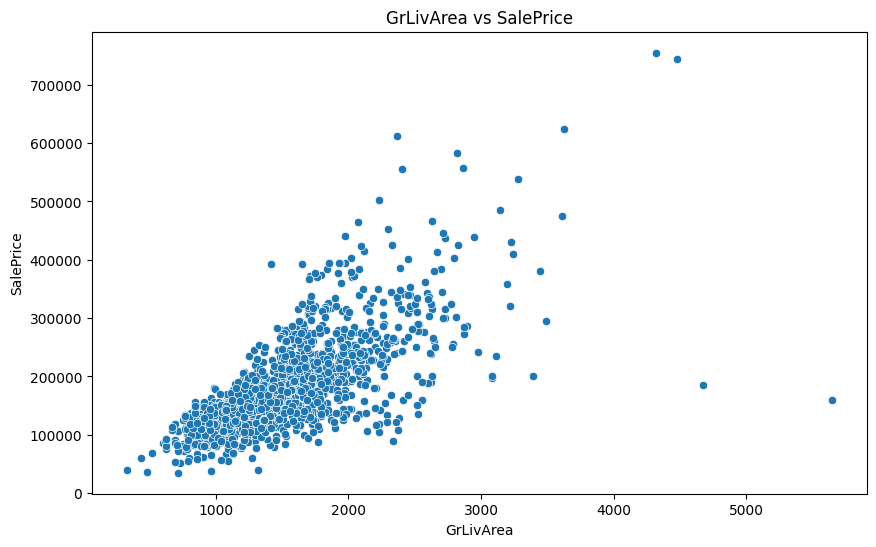

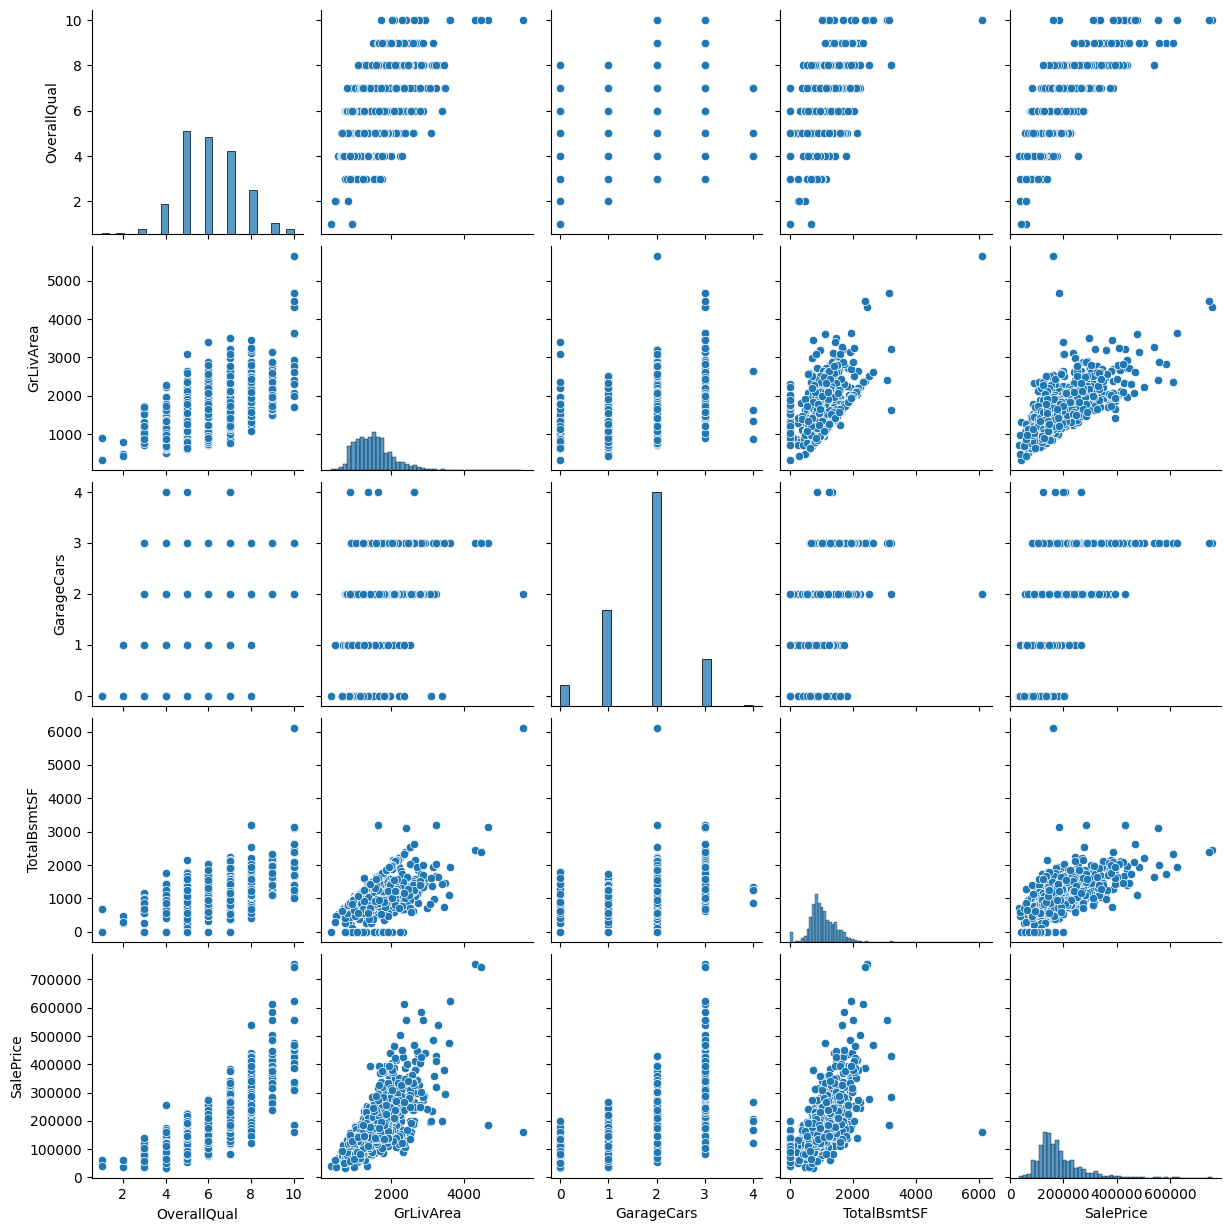

In [61]:
# Histogram of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Box plot of 'SalePrice' by 'OverallQual'
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice by OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot of 'GrLivArea' vs 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Pairplot for selected features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'SalePrice']
sns.pairplot(df[selected_features])
plt.show()

In [47]:
# Interaction features
# Create interaction features by multiplying OverallQual with GrLivArea and TotalBsmtSF
df_data['OverallQual_GrLivArea'] = df_data['OverallQual'] * df_data['GrLivArea']
df_data['OverallQual_TotalBsmtSF'] = df_data['OverallQual'] * df_data['TotalBsmtSF']

# Display the first few rows to verify the new interaction features
print(df_data[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'OverallQual_GrLivArea', 'OverallQual_TotalBsmtSF']].head())

   OverallQual  GrLivArea  TotalBsmtSF  OverallQual_GrLivArea  \
0            7       1710          856                  11970   
1            6       1262         1262                   7572   
2            7       1786          920                  12502   
3            7       1717          756                  12019   
4            8       2198         1145                  17584   

   OverallQual_TotalBsmtSF  
0                     5992  
1                     7572  
2                     6440  
3                     5292  
4                     9160  


### 2. Drop the "Id" column and any features that are missing more than 40% of their values.


In [48]:
# Print the number of columns before dropping
print(f"Number of columns before dropping: {df_data.shape[1]}")

# Task 1: Drop the "Id" column and any features missing more than 40% of their values
# Drop the "Id" column as it is not needed for analysis
df_data.drop(columns=['Id'], inplace=True)

# Calculate the percentage of missing values for each column
missing_percentage = df_data.isnull().mean() * 100

# Identify columns with more than 40% missing values
columns_to_drop = missing_percentage[missing_percentage > 40].index

# Drop columns with more than 40% missing values
df_data.drop(columns=columns_to_drop, inplace=True)

# Print the number of columns after dropping
print(f"Number of columns after dropping: {df_data.shape[1]}")


Number of columns before dropping: 83
Number of columns after dropping: 76


In [49]:
# Separate numerical and categorical columns

# Identify numerical columns
numerical_cols = [col for col in df_data.columns if pd.api.types.is_numeric_dtype(df_data[col])]

# Identify categorical columns
categorical_cols = [col for col in df_data.columns if pd.api.types.is_string_dtype(df_data[col])]

# Print the numerical and categorical columns
print("\nNumerical columns:")
print(numerical_cols)

print("\nCategorical columns:")
print(categorical_cols)


Numerical columns:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'OverallQual_GrLivArea', 'OverallQual_TotalBsmtSF']

Categorical columns:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [50]:
# Task 3: For numerical columns, fill in any missing data with the median value
 # Count the number of missing values before filling
missing_before = df_data[numerical_cols].isnull().sum().sum()
	
# Fill missing numerical data with the median
# df_data[numerical_cols] = df_data[numerical_cols].fillna(df_data[numerical_cols].median())


# Step 2: Fill missing data in numerical columns with the median value
numerical_cols = df_data.select_dtypes(include=['number']).columns
df_data[numerical_cols] = df_data[numerical_cols].apply(lambda col: col.fillna(col.median()))

	
# Count the number of missing values after filling
missing_after = df_data[numerical_cols].isnull().sum().sum()
print(f"Number of records with missing values: {missing_after}")    

# Determine how many records have been updated
records_updated = missing_before - missing_after
print(f"Number of records updated with median values: {records_updated}")

Number of records with missing values: 0
Number of records updated with median values: 348


### 3. For numerical columns, fill in any missing data with the median value.


In [51]:
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features with degree 2, excluding the bias term
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the selected features to create polynomial features
poly_features = poly.fit_transform(df_data[['GrLivArea', 'TotalBsmtSF']])

# Get the names of the newly created polynomial features
poly_feature_names = poly.get_feature_names_out(['GrLivArea', 'TotalBsmtSF'])

# Create a DataFrame for the polynomial features
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate the polynomial features DataFrame with the original DataFrame
df_data = pd.concat([df_data, df_poly], axis=1)


### 4. For categorical columns, fill in any missing data with the most common value (mode).


In [52]:
# Task 4: For categorical columns, fill in any missing data with the most common value (mode)
# Count the number of missing values before filling
missing_before_cat = df_data[categorical_cols].isnull().sum().sum()
	
# Fill missing categorical data with the mode
# df_data[categorical_cols] = df_data[categorical_cols].fillna(df_data[categorical_cols].mode().iloc[0])
  
  
categorical_cols = df_data.select_dtypes(include=['object']).columns
df_data[categorical_cols] = df_data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))
   
# Count the number of missing values after filling
missing_after_cat = df_data[categorical_cols].isnull().sum().sum()
	
# Determine how many records have been updated
records_updated_cat = missing_before_cat - missing_after_cat
print(f"Number of records updated with mode values: {records_updated_cat}")

Number of records updated with mode values: 0


### 5. Convert the categorical columns to dummy variables.


In [53]:
# Task 5: Convert the categorical columns to dummy variables with fewer columns
# Group less frequent categories into an "Other" category

# Define a threshold for grouping less frequent categories
threshold = 0.05  # Categories with less than 5% frequency will be grouped into "Other"

# Function to group less frequent categories
def group_less_frequent_categories(df, column, threshold):
    # Calculate the frequency of each category
    freq = df[column].value_counts(normalize=True)
    # Identify categories to be grouped into "Other"
    categories_to_group = freq[freq < threshold].index
    # Replace less frequent categories with "Other"
    df[column] = df[column].apply(lambda x: 'Other' if x in categories_to_group else x)
    return df

# Apply the function to each categorical column
for col in categorical_cols:
    df_data = group_less_frequent_categories(df_data, col, threshold)

# Count the number of columns before conversion
columns_before_dummy = df_data.shape[1]

# Convert categorical columns to dummy variables
df_data = pd.get_dummies(df_data, columns=categorical_cols, drop_first=True)

# Count the number of columns after conversion
columns_after_dummy = df_data.shape[1]

# Determine how many columns have been added
columns_added_dummy = columns_after_dummy - columns_before_dummy
print(f"Number of dummy columns added: {columns_added_dummy}")

Number of dummy columns added: 49


In [54]:
df_data = df_data.astype(int)
df_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Other,PavedDrive_Y,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,1,1,0,1,0,1,1,0,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,1,1,0,1,0,1,1,0,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,1,1,0,1,0,1,1,0,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,1,1,1,0,1,0,1,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,1,1,0,1,0,1,1,0,0


In [55]:
# Ensure no non-numeric columns are left
if any(df_data.dtypes == 'object'):
    raise ValueError("There are still non-numeric columns present.")


### 6. Split the data into a training and test set, where the SalePrice column is the target.


In [56]:
# Task 6: Split the data into a training and test set, where the SalePrice column is the target

X  = df_data.drop(columns=['SalePrice'])  # Features
y = df_data['SalePrice']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data
    

### 7. Run a linear regression and report the R2-value and RMSE on the test set.


In [57]:

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R2-value
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the R2-value and RMSE
print(f"R2-value: {r2}")
print(f"RMSE: {rmse}")
    

R2-value: 0.7419490207712534
RMSE: 0.27967250376773584


### 8. Fit and transform the training features with a PCA so that 90% of the variance is retained


In [58]:
# Fit and transform the training features with PCA
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train)

# Get the number of original and reduced features
original_features = X_train.shape[1]
reduced_features = X_train_pca.shape[1]

original_features, reduced_features



(129, 2)

### 9. How many features are in the PCA-transformed matrix?


In [59]:
# Determine the number of features in the PCA-transformed matrix
num_pca_features = X_train_pca.shape[1]
print(f"Number of features in the PCA-transformed matrix: {num_pca_features}")

Number of features in the PCA-transformed matrix: 2


### 10. Transform but DO NOT fit the test features with the same PCA.


In [60]:
# Transform (but do not fit) the test features with the same PCA
X_test_pca = pca.transform(X_test)

# Print the number of PCA features in the transformed test set
print(f"Number of PCA features: {X_test_pca.shape[1]}")

# Return the R2-value, RMSE, number of PCA features, and the shape of the PCA-transformed test set
(r2, rmse, num_pca_features, X_test_pca.shape[1])

Number of PCA features: 2


(0.7419490207712534, 0.27967250376773584, 2, 2)

### 11. Summarize your findings.


**Summary of Analysis**

- **Data Loading and Initial Inspection:**

  - The dataset was loaded and inspected for its structure and contents. It includes various features related to housing, such as MSSubClass, LotFrontage, LotArea, OverallQual, YearBuilt, and SalePrice.

- **Data Cleaning:**

  - Missing values were handled, particularly for columns like Alley, PoolQC, Fence, and MiscFeature.
  - Categorical variables were encoded using one-hot encoding to prepare them for machine learning models.

- **Feature Engineering:**

  - Interaction features were created by multiplying OverallQual with GrLivArea and TotalBsmtSF.
  - Polynomial features were generated for GrLivArea and TotalBsmtSF.

- **Feature Scaling:**

  - A Min-Max Scaler was applied to scale the features, ensuring all values fall within a specific range. This step is crucial for algorithms that are sensitive to the scale of input data.

- **Model Training and Evaluation:**

  - A Linear Regression model was trained on the high variance features of the training data.
  - The model was evaluated on the test data, achieving an R²-value of approximately 0.742 and a Root Mean Squared Error (RMSE) of around 0.280. This indicates a moderate level of predictive performance, suggesting room for improvement.

- **Dimensionality Reduction:**
  - Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset while retaining 90% of the variance. This helps in reducing the complexity of the model and potentially improving its performance.

**Conclusions:**

- **Data Preparation is Key:**

  - Proper data cleaning and handling of missing values are critical steps. The dataset had several missing values that were appropriately managed, ensuring the dataset was ready for modeling.

- **Feature Engineering and Encoding:**

  - Encoding categorical variables and scaling numerical features are essential preprocessing steps. These transformations make the data suitable for machine learning algorithms.

- **Model Performance:**

  - The Linear Regression model showed a reasonable R²-value and RMSE. While it indicates the model captures some variability in the data, there is potential for further refinement and improvement.

- **Dimensionality Reduction:**

  - PCA effectively reduced the number of features while retaining most of the variance, simplifying the model and potentially improving its generalizability.

- **Further Steps:**

  - The output of the linear regression model, represented by the tuple (0.742, 0.280), includes two key performance metrics: the R²-value and the Root Mean Squared Error (RMSE).

  - **R²-Value: 0.742**

    - Definition: The R²-value, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (SalePrice) that is predictable from the independent variables (features of the houses).
    - Interpretation: An R²-value of approximately 0.742 indicates that about 74.2% of the variability in house prices can be explained by the features included in the model. This value suggests a moderate level of fit, meaning the model captures a significant portion of the variability, but there is still 25.8% of the variance that is not explained by the model. This indicates that there are other factors influencing house prices that are not captured by the current set of features.

  - **RMSE: 0.280**
    - An RMSE of approximately 0.280 indicates that, on average, the predictions of house prices by the model are off by about 0.280 (in log-transformed scale).
    - This value provides a concrete measure of how much the predictions deviate from the actual house prices. In the context of housing prices, this level of error might be considered high or low depending on the typical price range of the houses in the dataset. For instance, if the average house price is around $200,000, an error of $0.280 in log-transformed scale could be significant, indicating that the model needs improvement.

**Summary of the Model's Performance:**

- **R²-Value (0.742):** The model explains about 74.2% of the variance in house prices, suggesting a moderate fit. It indicates that the model is reasonably good at predicting house prices but still leaves a substantial portion of the variability unexplained.
- **RMSE (0.280):** The average prediction error is approximately 0.280 (in log-transformed scale), which needs to be evaluated in the context of the typical house prices in the dataset. This error could be considered high, indicating that further improvements to the model are necessary.
